In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import plotting as pdplt
%matplotlib inline


In [2]:
data = pd.read_csv('datasets/housing/housing.csv')

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


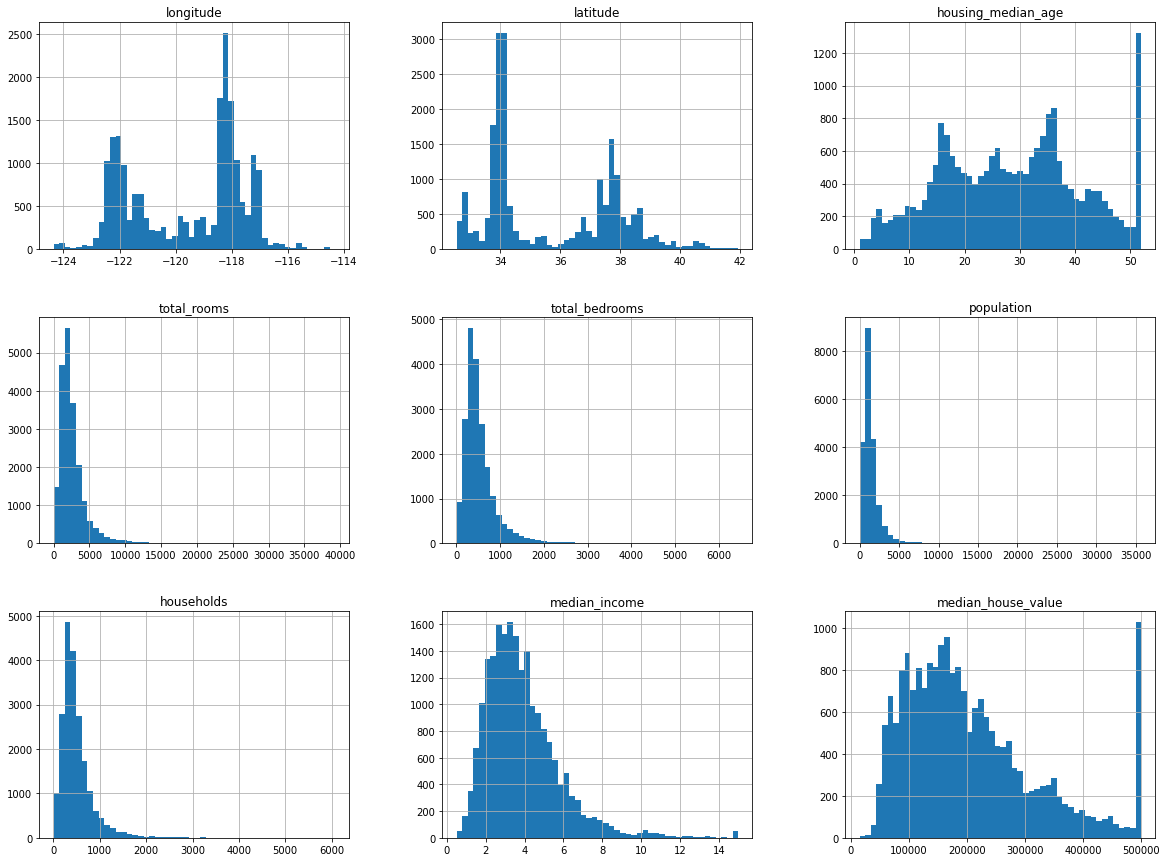

In [7]:
data.hist(bins=50,  figsize=(20,15) )
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)


In [9]:
data["income_cat"] = pd.cut(data["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

<AxesSubplot:>

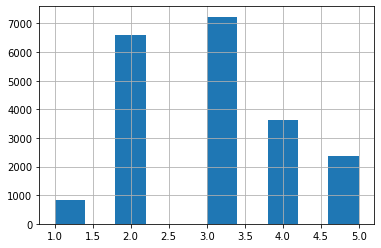

In [10]:
data["income_cat"].hist()

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_set, test_set in split.split(data, data["income_cat"]):
    strat_train_set = data.loc[train_set]
    strat_test_set = data.loc[test_set]

In [12]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [13]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [14]:
data = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

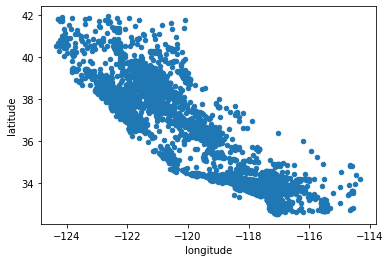

In [15]:
data.plot(kind="scatter", x="longitude", y="latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

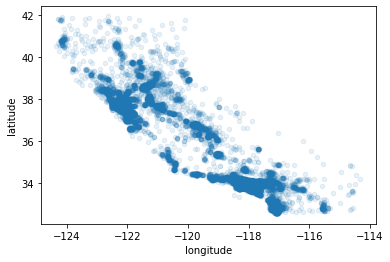

In [16]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

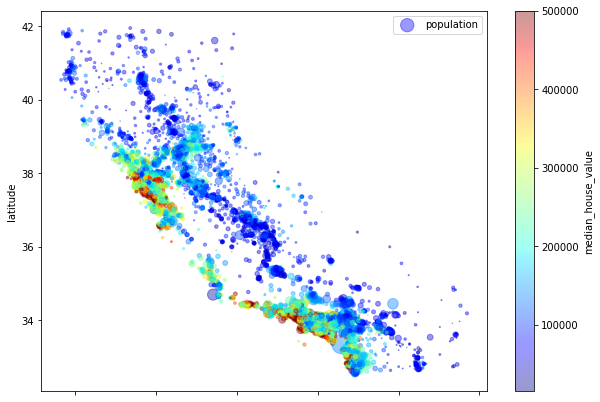

In [17]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=data["population"] / 100, label="population", figsize=(10,7), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)

In [18]:
cor_mat = data.corr()

In [19]:
cor_mat["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

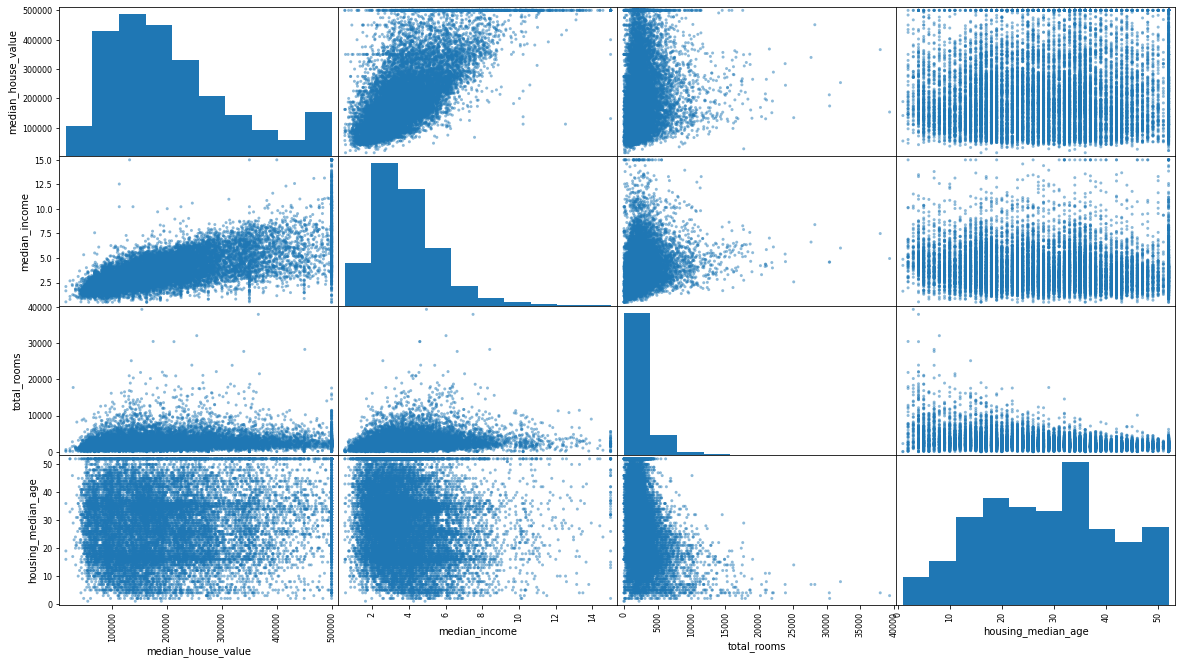

In [20]:
attr = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

pdplt.scatter_matrix(data[attr], figsize=(20,11))

In [21]:
data = strat_train_set.drop("median_house_value", axis=1)
data_labels = strat_train_set["median_house_value"].copy()

In [22]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

data_num = data.drop("ocean_proximity", axis=1)

imputer.fit(data_num)


SimpleImputer(strategy='median')

In [23]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [24]:
data_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [25]:
X = imputer.transform(data_num)

In [26]:
data_tr = pd.DataFrame(X, columns=data_num.columns, index = data_num.index)

In [27]:
data_cat = data[["ocean_proximity"]]
data_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [28]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
data_cat_encoded = ordinal_encoder.fit_transform(data_cat)
data_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [29]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [30]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()

data_cat_one_hot = cat_encoder.fit_transform(data_cat)
data_cat_one_hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [31]:
data_cat_one_hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [32]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [33]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
data_extra_attribs = attr_adder.transform(data.values)

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

data_num_tr = num_pipeline.fit_transform(data_num)

In [35]:
from sklearn.compose import ColumnTransformer

num_attribs = list(data_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])
data_prepared = full_pipeline.fit_transform(data)

In [36]:
from sklearn.linear_model import LinearRegression

lin_rg = LinearRegression()

lin_rg.fit(data_prepared, data_labels)

LinearRegression()

In [37]:
from sklearn.metrics import mean_squared_error
data_predictions = lin_rg.predict(data_prepared)
lin_mse = mean_squared_error(data_labels, data_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

In [38]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()

dt.fit(data_prepared, data_labels)

DecisionTreeRegressor()

In [39]:
data_predictions = dt.predict(data_prepared)
dt_mse = mean_squared_error(data_labels, data_predictions)
dt_rmse = np.sqrt(dt_mse)
dt_rmse

0.0

In [40]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(dt, data_prepared, data_labels, scoring="neg_mean_squared_error", cv=10)
dt_rmse_scores = np.sqrt(-score)

In [41]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(dt_rmse_scores)

Scores: [72287.71356269 71215.84709801 69233.39821236 72872.74899616
 70103.34471561 76643.00635142 71450.95615423 72114.44920186
 68571.84308185 70800.64117186]
Mean: 71529.39485460384
Standard deviation: 2134.451629024014


In [42]:
lin_score = cross_val_score(lin_rg, data_prepared, data_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_score)
display_scores(lin_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.3282098180694


In [43]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(data_prepared, data_labels)

data_predictions = forest_reg.predict(data_prepared)
forest_mse = mean_squared_error(data_labels, data_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18747.822361993156

In [44]:
forest_score = cross_val_score(forest_reg, data_prepared, data_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_score)
display_scores(forest_rmse_scores)

Scores: [51453.51716558 48534.36862415 46782.87993511 52475.74102877
 47729.16196608 51434.30507224 52257.17182488 49706.06298049
 48578.11708187 53962.88177608]
Mean: 50291.42074552602
Standard deviation: 2236.336852172071


In [45]:
import joblib

joblib.dump(forest_reg, "california_housing_Forest_reg_model.pkl")

['california_housing_Forest_reg_model.pkl']

In [46]:
model_loaded = joblib.load("california_housing_Forest_reg_model.pkl")

In [47]:
model_loaded

RandomForestRegressor()

In [48]:
model_loaded.predict(data_prepared)

array([ 76707.  , 293182.01,  82226.  , ..., 158987.  , 247006.  ,
        72273.  ])

In [49]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(data_prepared, data_labels)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [50]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [51]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [52]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64002.576478805444 {'max_features': 2, 'n_estimators': 3}
56061.751854421906 {'max_features': 2, 'n_estimators': 10}
52611.81075887071 {'max_features': 2, 'n_estimators': 30}
60233.97922574869 {'max_features': 4, 'n_estimators': 3}
52853.023895323924 {'max_features': 4, 'n_estimators': 10}
50571.638053269184 {'max_features': 4, 'n_estimators': 30}
59536.60437561439 {'max_features': 6, 'n_estimators': 3}
52276.883265809185 {'max_features': 6, 'n_estimators': 10}
50172.50814375025 {'max_features': 6, 'n_estimators': 30}
58667.73773526769 {'max_features': 8, 'n_estimators': 3}
51718.43614203496 {'max_features': 8, 'n_estimators': 10}
50021.60463036455 {'max_features': 8, 'n_estimators': 30}
62758.690220385404 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54540.56596425988 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60804.783226139785 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52170.9170388251 {'bootstrap': False, 'max_features': 3, 'n_estimator

In [53]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.88622218e-02, 6.86408688e-02, 4.34140271e-02, 1.50521102e-02,
       1.63252336e-02, 1.45682165e-02, 1.34380612e-02, 3.51507089e-01,
       5.72829239e-02, 1.14236945e-01, 6.08451195e-02, 5.82433723e-03,
       1.63227901e-01, 1.13318816e-04, 2.44677459e-03, 4.21485222e-03])

In [54]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3515070885322457, 'median_income'),
 (0.16322790123421574, 'INLAND'),
 (0.11423694474040029, 'pop_per_hhold'),
 (0.06886222183036136, 'longitude'),
 (0.06864086878615458, 'latitude'),
 (0.06084511953406244, 'bedrooms_per_room'),
 (0.057282923865096244, 'rooms_per_hhold'),
 (0.04341402707653054, 'housing_median_age'),
 (0.016325233620969135, 'total_bedrooms'),
 (0.015052110206589104, 'total_rooms'),
 (0.01456821654148389, 'population'),
 (0.013438061167442358, 'households'),
 (0.0058243372347581, '<1H OCEAN'),
 (0.00421485222046264, 'NEAR OCEAN'),
 (0.0024467745935106353, 'NEAR BAY'),
 (0.00011331881571715455, 'ISLAND')]

In [55]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [56]:
final_rmse

48097.47039829123

In [57]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))


array([46086.1604753, 50027.98347  ])